<a href="https://colab.research.google.com/github/Psyclophe/Power-PDF/blob/master/K_means_Aprendizaje_no_supervisado_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Science
### Módulo 7 _ Machine Learning
### Aprendizaje no supervisado

# K-Means - clustering
### `Skillsforindustry.org`


In [ ]:
# Tratamiento de datos
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
help(scale)

Help on function scale in module sklearn.preprocessing._data:

scale(X, *, axis=0, with_mean=True, with_std=True, copy=True)
    Standardize a dataset along any axis.
    
    Center to the mean and component wise scale to unit variance.
    
    Read more in the :ref:`User Guide <preprocessing_scaler>`.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The data to center and scale.
    
    axis : int, default=0
        axis used to compute the means and standard deviations along. If 0,
        independently standardize each feature, otherwise (if 1) standardize
        each sample.
    
    with_mean : bool, default=True
        If True, center the data before scaling.
    
    with_std : bool, default=True
        If True, scale the data to unit variance (or equivalently,
        unit standard deviation).
    
    copy : bool, default=True
        set to False to perform inplace row normalization and avoid a
        copy 

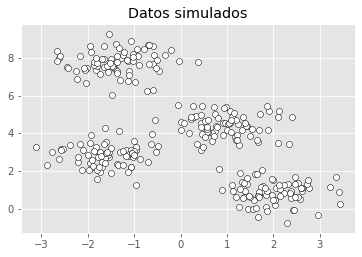

In [ ]:
# Simulación de datos
X, y = make_blobs(
        n_samples    = 300, 
        n_features   = 2, 
        centers      = 4, 
        cluster_std  = 0.60, 
        shuffle      = False, 
        random_state = 0
       )

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1], 
    c = 'white',
    marker    = 'o',
    edgecolor = 'black', 
)
ax.set_title('Datos simulados');

## Modelo Kmeans

Con la clase `sklearn.cluster.KMeans` de Scikit-Learn se pueden entrenar modelos de clustering utilizando el algoritmo k-means. Entre sus parámetros destacan:

* `n_clusters`: determina el número  K  de clusters que se van a generar.

* `init`: estrategia para asignar los centroides iniciales. Por defecto se emplea 'k-means++', una estrategia que trata de alejar los centroides lo máximo posible facilitando la convergencia. Sin embargo, esta estrategia puede ralentizar el proceso cuando hay muchos datos, si esto ocurre, es mejor utilizar 'random'.

* `n_init`: determina el número de veces que se va a repetir el proceso, cada vez con una asignación aleatoria inicial distinta. Es recomendable que este último valor sea alto, entre 10-25, para no obtener resultados subóptimos debido a una iniciación poco afortunada del proceso.

* `max_iter`: número máximo de iteraciones permitidas.

* `random_state`: semilla para garantizar la reproducibilidad de los resultados.

In [ ]:
# Escalado de datos
X_scaled = scale(X)
X_scaled[:,1]

array([ 0.22486767,  0.46667959,  0.15792619,  0.2070449 ,  0.0822013 ,
       -0.06815281,  0.28117366, -0.04221927, -0.20723099,  0.08636584,
        0.47017474,  0.21735249, -0.32920119,  0.1659599 ,  0.40831766,
        0.05969362, -0.19927287,  0.58171547,  0.02823634,  0.30987385,
        0.0804446 ,  0.21937748, -0.14380893,  0.22897636,  0.19981552,
        0.04569048,  0.04642912, -0.27023217,  0.03664525,  0.23695826,
        0.14177035,  0.15961938, -0.1563652 , -0.02893055, -0.00438029,
        0.14274808,  0.33844993, -0.22620153,  0.56899873,  0.0880477 ,
        0.37404379,  0.41296662,  0.35601515,  0.29344285,  0.5435082 ,
        0.22287299, -0.18253101,  0.35433716,  0.5800579 , -0.04344488,
        0.47275951,  0.33965895,  0.57228316,  0.3156583 ,  0.09382026,
        0.34340357, -0.12498821,  0.43704896,  0.09506574,  0.55819596,
        0.22414093,  0.2546751 ,  0.13710988,  0.28645966,  0.08147367,
       -0.12351944,  0.23153884,  0.27686715,  0.34856402,  0.38

In [ ]:
X[:, 1]

array([ 4.55014643,  5.17635143,  4.37679234,  4.50399192,  4.18069237,
        3.79132988,  4.69595848,  3.85848832,  3.43116792,  4.19147702,
        5.18540259,  4.53068484,  3.11530945,  4.39759671,  5.02521524,
        4.12240568,  3.45177657,  5.47425256,  4.04094275,  4.77028154,
        4.17614316,  4.53592883,  3.59540802,  4.56078645,  4.48527047,
        4.08614263,  4.08805543,  3.26801777,  4.06271877,  4.58145668,
        4.33495456,  4.38117707,  3.56289184,  3.89290127,  3.95647753,
        4.33748653,  4.84428322,  3.38204112,  5.44132083,  4.19583243,
        4.93645836,  5.03725437,  4.88977075,  4.72773123,  5.37530962,
        4.54498095,  3.49513189,  4.88542535,  5.46996004,  3.85531444,
        5.1920962 ,  4.84741412,  5.4498263 ,  4.78526116,  4.21078127,
        4.85711133,  3.64414685,  5.09961887,  4.2140066 ,  5.41334556,
        4.54826443,  4.62733684,  4.32288566,  4.7096473 ,  4.17880807,
        3.64795042,  4.56742235,  4.68480619,  4.87047502,  4.97

In [ ]:
X_scaled

In [ ]:
X.std(axis =0)

array([1.63327104, 2.58963659])

In [ ]:
(X[:, 0] - X[:, 0].mean())/X[:, 0].std()

array([ 0.5636948 ,  0.65452936,  0.88118892,  0.7646714 ,  1.15047968,
        0.71662223, -0.33625538,  0.91917348,  1.43543259,  0.61842327,
        1.1646966 ,  0.65853501,  0.27547556,  0.47380404,  1.05357413,
        0.45932463,  0.21641596, -0.02520366,  0.41438707,  0.14138528,
        0.00873033,  0.27265393,  0.41396352,  0.59126033,  0.62604921,
        0.36858821,  0.35457767,  0.30289519,  0.66679281,  0.00274217,
        0.26830739,  0.86945278,  1.02018469,  0.74941798,  0.28171651,
        0.48716114,  0.17358283,  0.77267957,  1.14833912,  1.03465096,
        0.20826068,  0.45350191,  0.67812547,  0.73252848,  0.60547068,
        0.64823592,  1.29340941,  0.1348868 ,  0.17065365,  0.44966592,
        1.30802719,  1.28768161,  0.28523269,  0.5031594 ,  0.94959676,
        0.82720216,  0.73989742,  0.71117444,  0.34645627,  0.44175496,
        0.84858822,  0.31877628,  0.35388989,  0.36802836,  0.81343033,
        0.74709078,  0.05378357,  0.66284271,  1.4770877 ,  0.26

In [ ]:
(X - X.mean(axis =0) ) / X.std(axis =0) 

array([[ 0.5636948 ,  0.22486767],
       [ 0.65452936,  0.46667959],
       [ 0.88118892,  0.15792619],
       [ 0.7646714 ,  0.2070449 ],
       [ 1.15047968,  0.0822013 ],
       [ 0.71662223, -0.06815281],
       [-0.33625538,  0.28117366],
       [ 0.91917348, -0.04221927],
       [ 1.43543259, -0.20723099],
       [ 0.61842327,  0.08636584],
       [ 1.1646966 ,  0.47017474],
       [ 0.65853501,  0.21735249],
       [ 0.27547556, -0.32920119],
       [ 0.47380404,  0.1659599 ],
       [ 1.05357413,  0.40831766],
       [ 0.45932463,  0.05969362],
       [ 0.21641596, -0.19927287],
       [-0.02520366,  0.58171547],
       [ 0.41438707,  0.02823634],
       [ 0.14138528,  0.30987385],
       [ 0.00873033,  0.0804446 ],
       [ 0.27265393,  0.21937748],
       [ 0.41396352, -0.14380893],
       [ 0.59126033,  0.22897636],
       [ 0.62604921,  0.19981552],
       [ 0.36858821,  0.04569048],
       [ 0.35457767,  0.04642912],
       [ 0.30289519, -0.27023217],
       [ 0.66679281,

In [ ]:
### Replica la operación que hace scaler

In [ ]:
# Modelo
modelo_kmeans = KMeans(n_clusters=4, n_init=25, random_state=123)
modelo_kmeans.fit(X=X_scaled)

KMeans(n_clusters=4, n_init=25, random_state=123)

El objeto devuelto por `KMeans()` contiene entre otros datos: la media de cada una de las variables para cada cluster `(cluster_centers_)`, es decir, los centroides. Un vector indicando a qué cluster se ha asignado cada observación `(.labels_)` y la suma total de cuadrados internos de todos los clusters `(.inertia_)`.

## Número de clusters



Al tratarse de una simulación, se conoce el verdadero número de grupos (4) y a cuál de ellos pertenece cada observación. Esto no sucede en la mayoría de casos prácticos, pero es útil como ejemplo ilustrativo cómo funciona K-means.



In [ ]:
# Clasificación con el modelo kmeans
y_predict = modelo_kmeans.predict(X=X_scaled)

In [ ]:
##Paleta de colores
plt.rcParams['axes.prop_cycle'].by_key()['color']#[i]

['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']

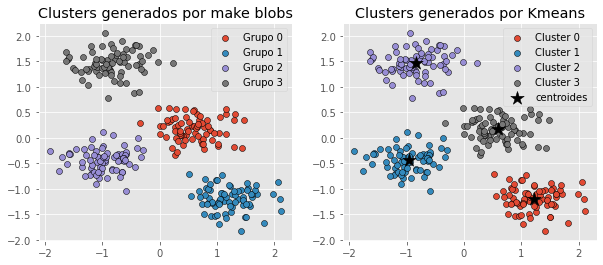

In [ ]:
# Representación gráfica: grupos originales vs clusters creados
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Grupos originales
for i in np.unique(y):
    ax[0].scatter(
        x = X_scaled[y == i, 0],
        y = X_scaled[y == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Grupo {i}"
    )
    
ax[0].set_title('Clusters generados por make blobs')
ax[0].legend();

for i in np.unique(y_predict):
    ax[1].scatter(
        x = X_scaled[y_predict == i, 0],
        y = X_scaled[y_predict == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Cluster {i}"
    )
    
ax[1].scatter(
    x = modelo_kmeans.cluster_centers_[:, 0],
    y = modelo_kmeans.cluster_centers_[:, 1], 
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[1].set_title('Clusters generados por Kmeans')
ax[1].legend();

Este tipo de visualización es muy útil e informativa, sin embargo, solo es posible cuando se trabaja con dos dimensiones. Si los datos contienen más de dos variables (dimensiones), una posible solución es utilizar las dos primeras componentes principales obtenidas con un PCA (Veremos como hacer PCAs en proximas sesiones)

El número de aciertos y errores puede representarse en modo de matriz de confusión. A la hora de interpretar estas matrices, es importante recordar que el clustering asigna las observaciones a clusters cuyo identificador no tiene porqué coincidir con la nomenclatura empleada para los grupos reales. En este ejemplo, el grupo 1 se ha asignado al cluster 3. Así pues, por cada fila de la matriz cabe esperar un valor alto (coincidencias) para una de las posiciones y valores bajos en las otras (errores de clasificación), pero no tienen por qué coincidir los nombres (diagonal).

In [ ]:
y_predict = np.where(y_predict == 0, 6, y_predict)
y_predict = np.where(y_predict == 1, 7, y_predict)
y_predict = np.where(y_predict == 3, 0, y_predict)
y_predict = np.where(y_predict == 2, 3, y_predict)
y_predict = np.where(y_predict == 6, 1, y_predict)
y_predict = np.where(y_predict == 7, 2, y_predict)


In [ ]:
# Matriz de confusión: grupos originales vs clusters creados

pd.crosstab(y, y_predict, dropna=False, rownames=['grupo_real'], colnames=['cluster'])

cluster,0,1,2,3
grupo_real,,,,
0,75,0,0,0
1,0,75,0,0
2,0,0,75,0
3,0,0,0,75


In [ ]:
### Corríge las etiquetas

En este análisis, todas las observaciones se han clasificado correctamente. De nuevo repetir que, en la realidad, no se suelen conocer los verdaderos grupos en los que se dividen las observaciones, de lo contrario no se necesitaría aplicar clustering.

Supóngase ahora que se trata de un caso real, en el que se desconoce el número de grupos en los que se subdividen las observaciones. El analista tendría que probar con diferentes valores de  K  y decidir cuál parece más razonable. A continuación, se muestran los resultados para *K=2*  y  *K=6* .

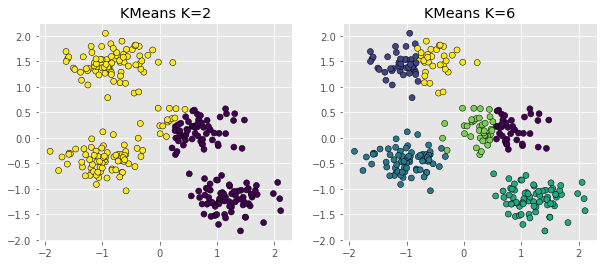

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Resultados para K = 2
# ==============================================================================
y_predict = KMeans(n_clusters=2, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[0].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[0].set_title('KMeans K=2');

# Resultados para K = 6
# ==============================================================================
y_predict = KMeans(n_clusters=6, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[1].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[1].set_title('KMeans K=6');

In [ ]:
### Agrega los centroides en las gráficas anteriores

Al observar los resultados obtenidos para K = 2, es intuitivo pensar que el grupo que se encuentra entorno a las coordenadas  x=0.5,y=0  (mayoritariamente considerado como amarillo) debería ser un grupo separado. Para K = 6 no parece muy razonable la separación de los grupos amarillo y azul. Este ejemplo muestra la principal limitación del método de K-means, el hecho de tener que escoger de antemano el número de clusters que se generan.

La deducción anterior solo puede hacerse visualmente cuando se trata de dos dimensiones. Una forma sencilla de estimar el número K óptimo de clusters cuando no se dispone de esta información, es aplicar el algoritmo de K-means para un rango de valores de K e identificar aquel valor a partir del cual la reducción en la suma total de varianza intra-cluster (inertia) deja de ser sustancial. A esta estrategia se la conoce como método del codo o elbow method.

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.58 µs


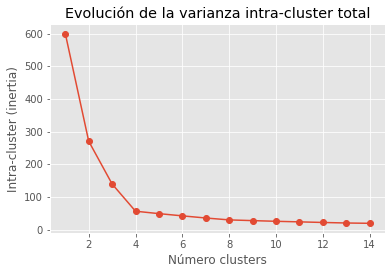

In [ ]:
%time
# Método elbow para identificar el número óptimo de clusters
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(X_scaled)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

A partir de 4 clusters la reducción en la suma total de cuadrados internos parece estabilizarse, indicando que **K = 4** es una buena opción.



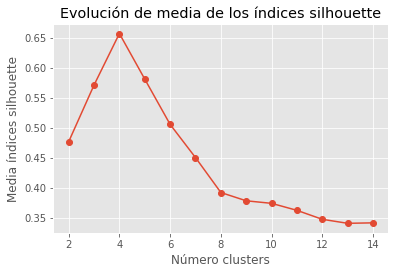

In [ ]:
# Método silhouette para identificar el número óptimo de clusters
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

El valor medio de los índices silhouette se maximiza con 4 clusters. Acorde a este criterio,**K = 4** es la mejor opción.

Ambos criterios, elbow y silhouette, identifican el valor K= como valor óptimo de clusters.

In [ ]:
### Crea 4 clusters con Kmeans

In [ ]:
# Modelo
modelo_kmeans = KMeans(n_clusters=4, n_init=25, random_state=123)
modelo_kmeans.fit(X=X_scaled)

KMeans(n_clusters=4, n_init=25, random_state=123)